# Importing required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('scrapeddata.xlsx')

In [4]:
df

,Team_Name,Year,Wins,Losses,ot_losses,Goals_for,Goals_Against,Difference
0,Boston Bruins,1990,44,24,NaN,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,292,278,14
2,Calgary Flames,1990,46,26,NaN,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,273,298,-25
...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8.0,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10.0,231,264,-33
579,Vancouver Canucks,2011,51,22,9.0,249,198,51
580,Washington Capitals,2011,42,32,8.0,222,230,-8


# Understanding of Data

Team_Name: Identifies the hockey team.</br>
Year: Specifies the year in which the data has recorded.</br>
Wins: Number of games won by the team.</br>
Losses: Number of games lost by the team.</br>
ot_losses: Number of overtime losses.</br>
Goals_for: Total goals scored by the team.</br>
Goals_Against: Total goals scored against the team.</br>
Difference: Net goal difference (Goals_for - Goals_Against)

# EDA

In [5]:
# Original Datatypes
df.dtypes

Team_Name         object
Year               int64
Wins               int64
Losses             int64
ot_losses        float64
Goals_for          int64
Goals_Against      int64
Difference         int64
dtype: object

In [6]:
df.isnull().sum()

Team_Name          0
Year               0
Wins               0
Losses             0
ot_losses        224
Goals_for          0
Goals_Against      0
Difference         0
dtype: int64

# Assumption:
1. From 1990 to 1998 - It is possible that ot_losses have not recorded or reported coz they might have had different scoring systems back then.
2. Older datasets might not include overtime loss information if this metric was introduced later or not considered historically.

# Two Approaches to Handle this
1. Zero Imputation - For null values indicating absence of that metric 
2. Create two sepearate datasets - Historical(1990-1998) and Recent data(1988 onwards)

In [7]:
# We'll go for second approach as it makes more sense 

In [8]:
cutoff_year = 1998

In [9]:
historical_df = df[df['Year'] <= cutoff_year].copy()

In [10]:
historical_df

,Team_Name,Year,Wins,Losses,ot_losses,Goals_for,Goals_Against,Difference
0,Boston Bruins,1990,44,24,NaN,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,292,278,14
2,Calgary Flames,1990,46,26,NaN,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,273,298,-25
...,...,...,...,...,...,...,...,...
219,St. Louis Blues,1998,37,32,NaN,237,209,28
220,Tampa Bay Lightning,1998,19,54,NaN,179,292,-113
221,Toronto Maple Leafs,1998,45,30,NaN,268,231,37
222,Vancouver Canucks,1998,23,47,NaN,192,258,-66


In [11]:
recent_df = df[df['Year'] > cutoff_year].copy()

In [12]:
recent_df

,Team_Name,Year,Wins,Losses,ot_losses,Goals_for,Goals_Against,Difference
224,Mighty Ducks of Anaheim,1999,34,33,3.0,217,227,-10
225,Atlanta Thrashers,1999,14,57,4.0,170,313,-143
226,Boston Bruins,1999,24,33,6.0,210,248,-38
227,Buffalo Sabres,1999,35,32,4.0,213,204,9
228,Calgary Flames,1999,31,36,5.0,211,256,-45
...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8.0,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10.0,231,264,-33
579,Vancouver Canucks,2011,51,22,9.0,249,198,51
580,Washington Capitals,2011,42,32,8.0,222,230,-8


In [13]:
historical_df.isnull().sum()

Team_Name          0
Year               0
Wins               0
Losses             0
ot_losses        224
Goals_for          0
Goals_Against      0
Difference         0
dtype: int64

In [14]:
historical_df.drop(columns=['ot_losses'],inplace=True)

In [15]:
historical_df

,Team_Name,Year,Wins,Losses,Goals_for,Goals_Against,Difference
0,Boston Bruins,1990,44,24,299,264,35
1,Buffalo Sabres,1990,31,30,292,278,14
2,Calgary Flames,1990,46,26,344,263,81
3,Chicago Blackhawks,1990,49,23,284,211,73
4,Detroit Red Wings,1990,34,38,273,298,-25
...,...,...,...,...,...,...,...
219,St. Louis Blues,1998,37,32,237,209,28
220,Tampa Bay Lightning,1998,19,54,179,292,-113
221,Toronto Maple Leafs,1998,45,30,268,231,37
222,Vancouver Canucks,1998,23,47,192,258,-66


In [16]:
historical_df.describe()

,Year,Wins,Losses,Goals_for,Goals_Against,Difference
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,1994.178571,33.915179,33.915179,242.937500,242.937500,0.000000
std,2.545423,9.403126,9.815196,54.726189,56.306541,51.219303
min,1990.000000,9.000000,11.000000,115.000000,115.000000,-196.000000
25%,1992.000000,28.000000,27.000000,214.000000,205.000000,-25.000000
50%,1994.000000,34.000000,33.000000,242.000000,248.000000,2.000000
75%,1996.000000,40.000000,40.000000,279.250000,278.000000,35.000000
max,1998.000000,62.000000,71.000000,369.000000,414.000000,144.000000


In [17]:
# Feature Engineering for historical data(1990-1998)
historical_df['Win_Loss_Ratio'] = historical_df['Wins'] / historical_df['Losses']

In [18]:
historical_df['Goals_Per_Game'] = historical_df['Goals_for'] / (historical_df['Wins'] + df['Losses'])

In [19]:
historical_df['Goals_Against_Per_Game'] = historical_df['Goals_Against'] / (historical_df['Wins'] + historical_df['Losses'])

In [20]:
historical_df['Winning_Season'] = historical_df['Wins'] > historical_df['Losses']
historical_df['Losing_Season'] = historical_df['Losses'] > historical_df['Wins']

In [21]:
historical_df['Total_Points'] = historical_df['Wins'] * 2

In [22]:
def categorize_performance(row):
    if row['Total_Points'] > 80:
        return 'High'
    elif row['Total_Points'] > 50:
        return 'Medium'
    else:
        return 'Low'

historical_df['Performance_Category'] = historical_df.apply(categorize_performance, axis=1)

In [23]:
historical_df

,Team_Name,Year,Wins,Losses,Goals_for,Goals_Against,Difference,Win_Loss_Ratio,Goals_Per_Game,Goals_Against_Per_Game,Winning_Season,Losing_Season,Total_Points,Performance_Category
0,Boston Bruins,1990,44,24,299,264,35,1.833333,4.397059,3.882353,True,False,88,High
1,Buffalo Sabres,1990,31,30,292,278,14,1.033333,4.786885,4.557377,True,False,62,Medium
2,Calgary Flames,1990,46,26,344,263,81,1.769231,4.777778,3.652778,True,False,92,High
3,Chicago Blackhawks,1990,49,23,284,211,73,2.130435,3.944444,2.930556,True,False,98,High
4,Detroit Red Wings,1990,34,38,273,298,-25,0.894737,3.791667,4.138889,False,True,68,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,St. Louis Blues,1998,37,32,237,209,28,1.156250,3.434783,3.028986,True,False,74,Medium
220,Tampa Bay Lightning,1998,19,54,179,292,-113,0.351852,2.452055,4.000000,False,True,38,Low
221,Toronto Maple Leafs,1998,45,30,268,231,37,1.500000,3.573333,3.080000,True,False,90,High
222,Vancouver Canucks,1998,23,47,192,258,-66,0.489362,2.742857,3.685714,False,True,46,Low


# For Recent Data(1998 onwards)

In [24]:
recent_df

,Team_Name,Year,Wins,Losses,ot_losses,Goals_for,Goals_Against,Difference
224,Mighty Ducks of Anaheim,1999,34,33,3.0,217,227,-10
225,Atlanta Thrashers,1999,14,57,4.0,170,313,-143
226,Boston Bruins,1999,24,33,6.0,210,248,-38
227,Buffalo Sabres,1999,35,32,4.0,213,204,9
228,Calgary Flames,1999,31,36,5.0,211,256,-45
...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8.0,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10.0,231,264,-33
579,Vancouver Canucks,2011,51,22,9.0,249,198,51
580,Washington Capitals,2011,42,32,8.0,222,230,-8


In [25]:
recent_df.isnull().sum()

Team_Name        0
Year             0
Wins             0
Losses           0
ot_losses        0
Goals_for        0
Goals_Against    0
Difference       0
dtype: int64

In [26]:
recent_df.describe()

,Year,Wins,Losses,ot_losses,Goals_for,Goals_Against,Difference
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,2005.117318,38.837989,31.377095,7.460894,228.511173,228.511173,0.000000
std,3.872286,8.067399,7.244450,3.610191,26.921270,29.670433,41.202377
min,1999.000000,14.000000,15.000000,0.000000,164.000000,164.000000,-143.000000
25%,2002.000000,34.000000,27.000000,5.000000,211.000000,207.250000,-28.000000
50%,2006.000000,40.000000,30.000000,7.000000,227.000000,227.000000,4.000000
75%,2008.750000,44.000000,36.000000,10.000000,246.750000,248.000000,27.750000
max,2011.000000,58.000000,57.000000,18.000000,318.000000,316.000000,103.000000


In [27]:
recent_df['Win_Loss_Ratio'] = recent_df['Wins'] / recent_df['Losses']

In [28]:
recent_df['Goals_Per_Game'] = recent_df['Goals_for'] / (recent_df['Wins'] + recent_df['Losses'] + recent_df['ot_losses'])

In [29]:
df['Goals_Against_Per_Game'] = df['Goals_Against'] / (df['Wins'] + df['Losses'] + df['ot_losses'])

In [30]:
recent_df['Winning_Season'] = recent_df['Wins'] > recent_df['Losses']
recent_df['Losing_Season'] = recent_df['Losses'] > recent_df['Wins']

In [31]:
recent_df['Total_Points'] = recent_df['Wins'] * 2 + recent_df['ot_losses']

In [32]:
def categorize_performance(row):
    if row['Total_Points'] > 80:
        return 'High'
    elif row['Total_Points'] > 50:
        return 'Medium'
    else:
        return 'Low'

recent_df['Performance_Category'] = recent_df.apply(categorize_performance, axis=1)

In [33]:
recent_df

,Team_Name,Year,Wins,Losses,ot_losses,Goals_for,Goals_Against,Difference,Win_Loss_Ratio,Goals_Per_Game,Winning_Season,Losing_Season,Total_Points,Performance_Category
224,Mighty Ducks of Anaheim,1999,34,33,3.0,217,227,-10,1.030303,3.100000,True,False,71.0,Medium
225,Atlanta Thrashers,1999,14,57,4.0,170,313,-143,0.245614,2.266667,False,True,32.0,Low
226,Boston Bruins,1999,24,33,6.0,210,248,-38,0.727273,3.333333,False,True,54.0,Medium
227,Buffalo Sabres,1999,35,32,4.0,213,204,9,1.093750,3.000000,True,False,74.0,Medium
228,Calgary Flames,1999,31,36,5.0,211,256,-45,0.861111,2.930556,False,True,67.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,Tampa Bay Lightning,2011,38,36,8.0,235,281,-46,1.055556,2.865854,True,False,84.0,High
578,Toronto Maple Leafs,2011,35,37,10.0,231,264,-33,0.945946,2.817073,False,True,80.0,Medium
579,Vancouver Canucks,2011,51,22,9.0,249,198,51,2.318182,3.036585,True,False,111.0,High
580,Washington Capitals,2011,42,32,8.0,222,230,-8,1.312500,2.707317,True,False,92.0,High


# Univariate Analysis

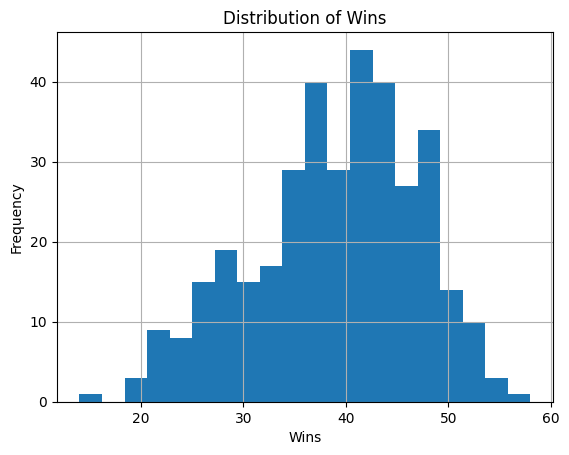

In [34]:
recent_df['Wins'].hist(bins=20)
plt.title('Distribution of Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.show()

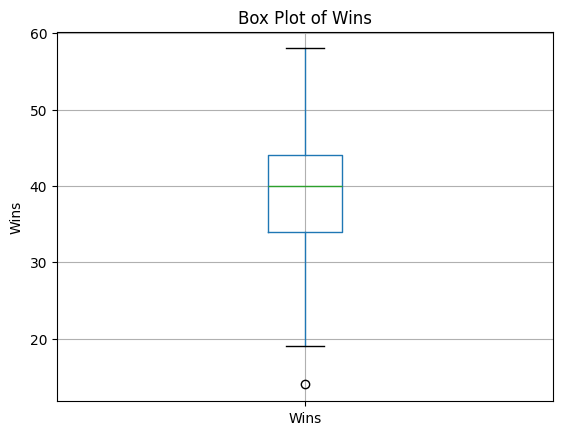

In [35]:
# Box plots
recent_df.boxplot(column='Wins')
plt.title('Box Plot of Wins')
plt.ylabel('Wins')
plt.show()

##Conclusion: There is only one outlier

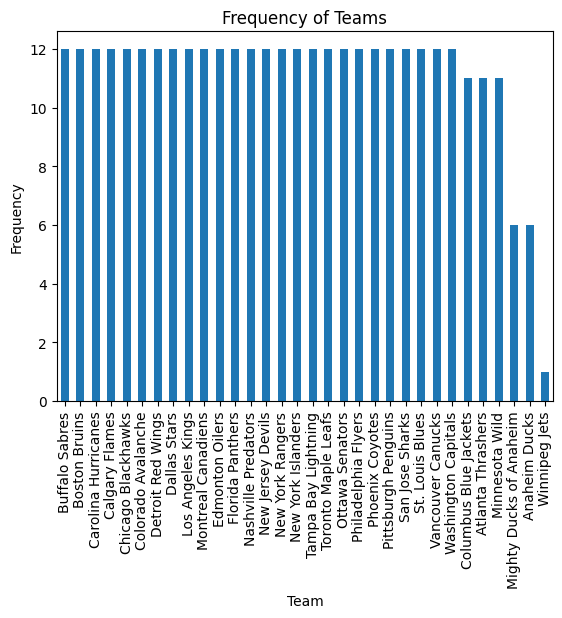

In [42]:
# categorical Features
#Q: Which teams has played less games from 1998 - 2011
recent_df['Team_Name'].value_counts().plot(kind='bar')
plt.title('Frequency of Teams')
plt.xlabel('Team')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

##Conclusion: Winnipeg Jets played the least number of games during this period

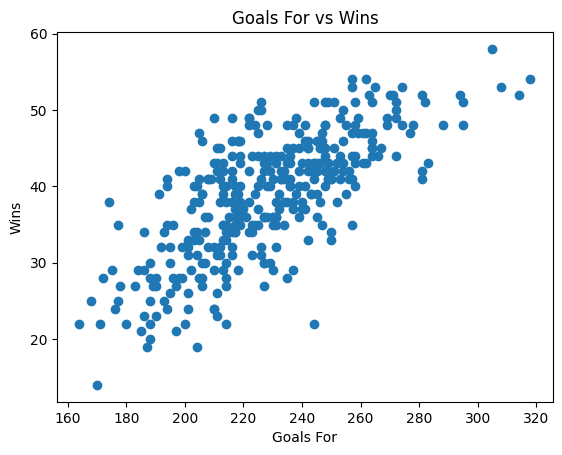

In [37]:
# Bivariate Analysis
plt.scatter(recent_df['Goals_for'], recent_df['Wins'])
plt.title('Goals For vs Wins')
plt.xlabel('Goals For')
plt.ylabel('Wins')
plt.show()

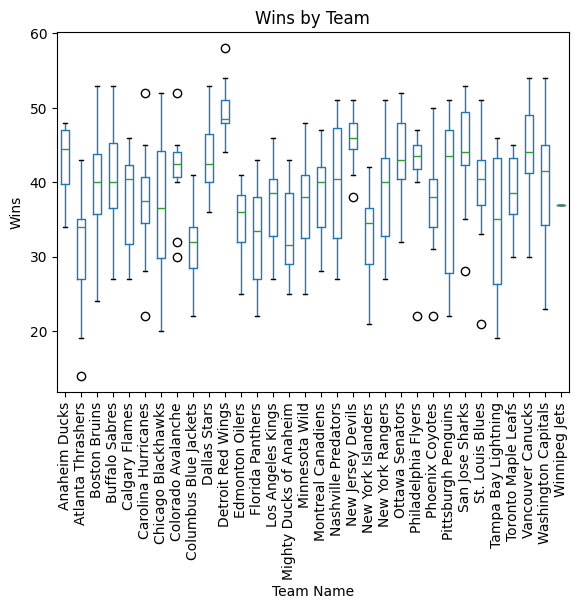

In [38]:
# Distribution of a numerical variable across different categories.
recent_df.boxplot(column='Wins', by='Team_Name', grid=False)
plt.title('Wins by Team')
plt.xlabel('Team Name')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.suptitle('')  # Suppress the default title to set your own
plt.show()

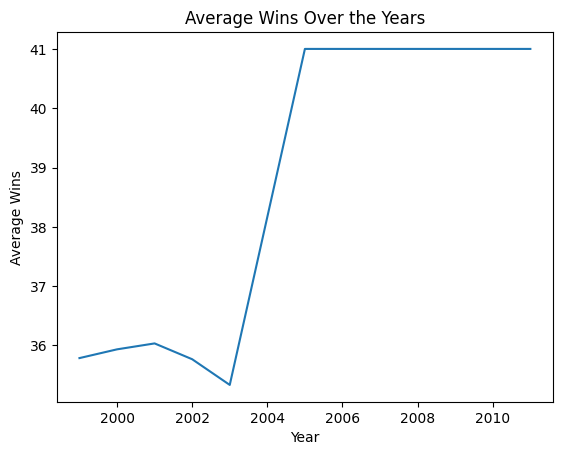

In [39]:
# Recent df
recent_df.groupby('Year')['Wins'].mean().plot()
plt.title('Average Wins Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Wins')
plt.show()

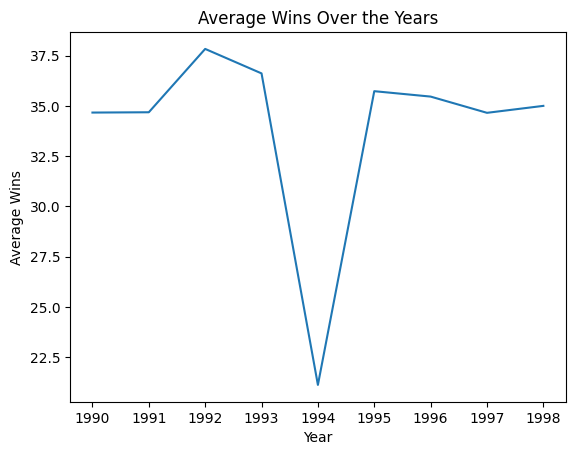

In [40]:
# historical df
historical_df.groupby('Year')['Wins'].mean().plot()
plt.title('Average Wins Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Wins')
plt.show()

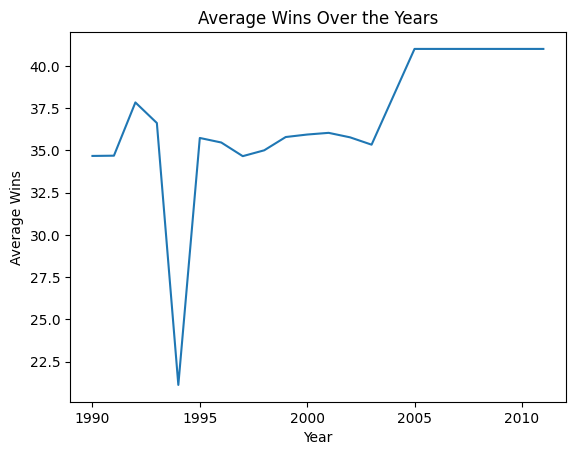

In [41]:
# Entire df
df.groupby('Year')['Wins'].mean().plot()
plt.title('Average Wins Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Wins')
plt.show()

In [44]:
# As we can see, Average Wins over the years has an impact from 2003(for recent_df) and from 1994(for historical df)
# So I want to do hypothesis testing to check if the average number of wins significantly changed after a certain year in recent_df and historical_df.

# Hypothesis Testing

In [45]:
# Scenario 1: Comparing Means Before and After a Certain Year
# Objective: Determine if the average number of wins significantly changed after a certain year in recent_df and historical_df.

In [46]:
# Null Hypothesis (H0): There is no significant difference in the average number of wins before and after the specified year (e.g., 2003 in recent_df and 1994 in historical_df).

# Alternative Hypothesis (H1): There is a significant difference in the average number of wins before and after the specified year.

In [47]:
# taking Significant value α = 0.05 

In [48]:
# test ----> t-test

In [49]:
import pandas as pd
import scipy.stats as stats

# Define cutoff year for recent data
cutoff_year_recent = 2003

# Create groups
group1_recent = recent_df[recent_df['Year'] <= cutoff_year_recent]['Wins']
group2_recent = recent_df[recent_df['Year'] > cutoff_year_recent]['Wins']

In [50]:
# Independent samples t-test
t_statistic_recent, p_value_recent = stats.ttest_ind(group1_recent, group2_recent)

print(f"Recent Data: t-statistic = {t_statistic_recent}, p-value = {p_value_recent}")

Recent Data: t-statistic = -6.365669908790675, p-value = 5.993701350708219e-10


In [52]:
alpha = 0.05
print("Conclusion\n:")
if p_value_recent < alpha:
    print(f"Recent Data: Reject the null hypothesis (H0).")
    print(f"There is a significant difference in the average number of wins before and after 2003.")
else:
    print(f"Recent Data: Fail to reject the null hypothesis (H0).")
    print(f"There is no significant difference in the average number of wins before and after 2003.")

Conclusion
:
Recent Data: Reject the null hypothesis (H0).
There is a significant difference in the average number of wins before and after 2003.


In [55]:
# For historical data
cutoff_year_hist = 1994

# Create groups
group1_hist = historical_df[historical_df['Year'] <= cutoff_year_hist]['Wins']
group2_hist = historical_df[historical_df['Year'] > cutoff_year_hist]['Wins']

In [59]:
# Independent samples t-test
t_statistic_hist, p_value_hist = stats.ttest_ind(group1_hist, group2_hist)

print(f"Historical Data: t-statistic = {t_statistic_hist}, p-value = {p_value_hist}")

Historical Data: t-statistic = -1.9472635270290535, p-value = 0.05276425197543138


In [60]:
alpha = 0.05
print("Conclusion\n:")
if p_value_hist < alpha:
    print(f"Historical Data: Reject the null hypothesis (H0).")
    print(f"There is a significant difference in the average number of wins before and after 1994.")
else:
    print(f"Historical Data: Fail to reject the null hypothesis (H0).")
    print(f"There is no significant difference in the average number of wins before and after 1994.")

Conclusion
:
Historical Data: Fail to reject the null hypothesis (H0).
There is no significant difference in the average number of wins before and after 1994.


In [61]:
# From my conclusion I found out that there is a significant difference in average number of wins before and after 2003 but there is no significant difference before and after 1994
# Which can also be proved by seeing line graph